In [ ]:
!pip install gdown
import gdown

In [ ]:
file_id = '1AEenvsEPa35bHgnqGpcXK8hqbp1iV6Ya'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'dataset_final_split.zip', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1AEenvsEPa35bHgnqGpcXK8hqbp1iV6Ya
From (redirected): https://drive.google.com/uc?id=1AEenvsEPa35bHgnqGpcXK8hqbp1iV6Ya&confirm=t&uuid=b34d1261-e798-45e3-8996-df8d9e1b5ede
To: /content/dataset_final_split.zip
100%|██████████| 175M/175M [00:01<00:00, 120MB/s]


'dataset_final_split.zip'

In [ ]:
import os
import zipfile

In [ ]:
with zipfile.ZipFile('dataset_final_split.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset')

In [ ]:
import shutil

# Pindahkan folder
shutil.move('dataset/content/data_final_split', 'data_final_split')

# Hapus folder 'dataset/content'
shutil.rmtree('dataset')

In [ ]:
base_dir = 'data_final_split'
splits = ['train', 'val', 'test']

for split in splits:
    print(f"\n=== {split.upper()} ===")
    split_dir = os.path.join(base_dir, split)
    for class_name in os.listdir(split_dir):
        class_dir = os.path.join(split_dir, class_name)
        if os.path.isdir(class_dir):
            n_files = len(os.listdir(class_dir))
            print(f"{class_name}: {n_files} gambar")



=== TRAIN ===
Daun: 1200 gambar
Kardus: 1200 gambar
Baterai: 1200 gambar
Sterofom: 1200 gambar
Logam: 1200 gambar
Masker: 1200 gambar
Lampu: 1200 gambar
Plastik: 1200 gambar
Elektronik: 1200 gambar
Pakaian: 1200 gambar
Sampah Makanan: 1200 gambar
Kaca: 1200 gambar
Kertas: 1200 gambar

=== VAL ===
Daun: 150 gambar
Kardus: 150 gambar
Baterai: 150 gambar
Sterofom: 150 gambar
Logam: 150 gambar
Masker: 150 gambar
Lampu: 150 gambar
Plastik: 150 gambar
Elektronik: 150 gambar
Pakaian: 150 gambar
Sampah Makanan: 150 gambar
Kaca: 150 gambar
Kertas: 150 gambar

=== TEST ===
Daun: 150 gambar
Kardus: 150 gambar
Baterai: 150 gambar
Sterofom: 150 gambar
Logam: 150 gambar
Masker: 150 gambar
Lampu: 150 gambar
Plastik: 150 gambar
Elektronik: 150 gambar
Pakaian: 150 gambar
Sampah Makanan: 150 gambar
Kaca: 150 gambar
Kertas: 150 gambar


# MODELING

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augmentasi data untuk training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

# Hanya rescale untuk validasi
val_datagen = ImageDataGenerator(rescale=1./255)

# Buat data generator
train_generator = train_datagen.flow_from_directory(
    directory=f'{base_dir}/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    directory=f'{base_dir}/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 15600 images belonging to 13 classes.
Found 1950 images belonging to 13 classes.


In [ ]:
print(train_generator.class_indices)

{'Baterai': 0, 'Daun': 1, 'Elektronik': 2, 'Kaca': 3, 'Kardus': 4, 'Kertas': 5, 'Lampu': 6, 'Logam': 7, 'Masker': 8, 'Pakaian': 9, 'Plastik': 10, 'Sampah Makanan': 11, 'Sterofom': 12}


### MODEL 1

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Model CNN sederhana
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callback
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
]

# Training model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=callbacks
)

Epoch 1/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 197s 396ms/step - accuracy: 0.1776 - loss: 2.4765 - val_accuracy: 0.4005 - val_loss: 1.8192 - learning_rate: 0.0010
Epoch 2/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 186s 381ms/step - accuracy: 0.3733 - loss: 1.8839 - val_accuracy: 0.4297 - val_loss: 1.6531 - learning_rate: 0.0010
Epoch 3/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 186s 381ms/step - accuracy: 0.4132 - loss: 1.7650 - val_accuracy: 0.4682 - val_loss: 1.5912 - learning_rate: 0.0010
Epoch 4/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 188s 385ms/step - accuracy: 0.4390 - loss: 1.6893 - val_accuracy: 0.4862 - val_loss: 1.5090 - learning_rate: 0.0010
Epoch 5/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 187s 383ms/step - accuracy: 0.4527 - loss: 1.6408 - val_accuracy: 0.5179 - val_loss: 1.4767 - learning_rate: 0.0010
Epoch 6/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 186s 381ms/step - accuracy: 0.4811 - loss: 1.5556 - val_accuracy: 0.5374 - val_loss: 1.3966 - learning_rate: 0.0010
Epoch 7/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 201s 380ms/step - accura

In [ ]:
# Evaluasi pakai test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    directory=f'{base_dir}/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy:.2%}")

Found 1950 images belonging to 13 classes.
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.6508 - loss: 1.1031
Test Accuracy: 68.67%


### MODEL 2

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Definisi model CNN
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Kompilasi model dengan RMSprop (default learning rate)
model2.compile(
    optimizer=RMSprop(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callback
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
]

# Training
history = model2.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=callbacks
)

Epoch 1/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 182s 367ms/step - accuracy: 0.2026 - loss: 2.5106 - val_accuracy: 0.4169 - val_loss: 1.7622 - learning_rate: 0.0010
Epoch 2/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 181s 372ms/step - accuracy: 0.3864 - loss: 1.8761 - val_accuracy: 0.4718 - val_loss: 1.5974 - learning_rate: 0.0010
Epoch 3/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 183s 374ms/step - accuracy: 0.4320 - loss: 1.7234 - val_accuracy: 0.4969 - val_loss: 1.5355 - learning_rate: 0.0010
Epoch 4/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 182s 372ms/step - accuracy: 0.4582 - loss: 1.6558 - val_accuracy: 0.5421 - val_loss: 1.4398 - learning_rate: 0.0010
Epoch 5/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 184s 376ms/step - accuracy: 0.4820 - loss: 1.5930 - val_accuracy: 0.5518 - val_loss: 1.4639 - learning_rate: 0.0010
Epoch 6/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 187s 383ms/step - accuracy: 0.5038 - loss: 1.5472 - val_accuracy: 0.5656 - val_loss: 1.3574 - learning_rate: 0.0010
Epoch 7/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 198s 376ms/step - accura

### MODEL 3

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Model CNN yang dioptimasi
model3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Kompilasi model
model3.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Callback
callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, verbose=1)
]

# Training model
history3 = model3.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=callbacks
)

### MODEL 4

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Model CNN lebih dalam (4 Conv2D layers)
model4 = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Kompilasi model
model4.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Callback
callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, verbose=1)
]

# Training model
history4 = model4.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=callbacks
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 210s 412ms/step - accuracy: 0.1237 - loss: 8.3179 - val_accuracy: 0.1154 - val_loss: 2.5433 - learning_rate: 0.0010
Epoch 2/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 187s 384ms/step - accuracy: 0.0961 - loss: 2.5423 - val_accuracy: 0.0872 - val_loss: 2.5544 - learning_rate: 0.0010
Epoch 3/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 188s 386ms/step - accuracy: 0.0918 - loss: 2.5460 - val_accuracy: 0.1287 - val_loss: 2.4802 - learning_rate: 0.0010
Epoch 4/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 191s 392ms/step - accuracy: 0.0953 - loss: 2.5356 - val_accuracy: 0.1128 - val_loss: 2.4911 - learning_rate: 0.0010
Epoch 5/10
488/488 ━━━━━━━━━━━━━━━━━━━━ 189s 388ms/step - accuracy: 0.0974 - loss: 2.5294 - val_accuracy: 0.1287 - val_loss: 2.4521 - learning_rate: 0.0010
Epoch 6/10
 89/488 ━━━━━━━━━━━━━━━━━━━━ 2:34 387ms/step - accuracy: 0.0977 - loss: 2.5170

KeyboardInterrupt: 

### MODEL Tata

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Contoh input size, sesuaikan kalau berbeda
input_shape = (224, 224, 3)
num_classes = 13

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1),
])

model3 = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    data_augmentation,

    # Block 1
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    # Block 2
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    # Block 3
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.3),

    # Fully Connected
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model3.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 512)            │         2,04

 Total params: 51,678,253 (197.14 MB)

 Trainable params: 51,676,333 (197.13 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, verbose=1)

history = model3.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - accuracy: 0.2535 - loss: 2.7320

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


488/488 ━━━━━━━━━━━━━━━━━━━━ 242s 470ms/step - accuracy: 0.2536 - loss: 2.7314 - val_accuracy: 0.3185 - val_loss: 2.0293 - learning_rate: 0.0010
Epoch 2/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 227s 465ms/step - accuracy: 0.3977 - loss: 1.8892 - val_accuracy: 0.3462 - val_loss: 2.0575 - learning_rate: 0.0010
Epoch 3/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 229s 469ms/step - accuracy: 0.4483 - loss: 1.6865 - val_accuracy: 0.3164 - val_loss: 2.1676 - learning_rate: 0.0010
Epoch 4/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step - accuracy: 0.4783 - loss: 1.5588
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
488/488 ━━━━━━━━━━━━━━━━━━━━ 228s 467ms/step - accuracy: 0.4783 - loss: 1.5588 - val_accuracy: 0.3005 - val_loss: 2.5706 - learning_rate: 0.0010
Epoch 5/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 228s 466ms/step - accuracy: 0.5323 - loss: 1.4014 - val_accuracy: 0.5364 - val_loss: 1.4280 - learning_rate: 3.0000e-04
Epoch 6/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 226s 464ms/step - accuracy: 0.5553

In [ ]:
# Evaluasi pakai test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    directory=f'{base_dir}/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

loss, accuracy = model3.evaluate(test_generator)
print(f"Test Accuracy: {accuracy:.2%}")

Found 1950 images belonging to 13 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.5634 - loss: 1.5036
Test Accuracy: 59.38%


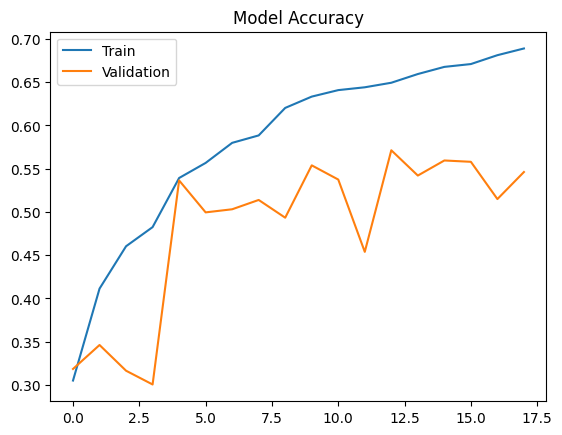

In [ ]:
# package matplotlib
import matplotlib.pyplot as plt

# Plot akurasi
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend()
plt.title('Model Accuracy')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# --- Parameter Dasar ---
input_shape = (224, 224, 3)
num_classes = 13

# --- Data Augmentation Layer ---
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2)
], name="data_augmentation")

# --- Fungsi Membangun Model CNN dari Awal (model6) ---
def build_model6_from_scratch(input_shape, num_classes, data_augmentation_layer):
    inputs = layers.Input(shape=input_shape, name="input_layer")

    # Augmentasi data hanya aktif saat training
    x = data_augmentation_layer(inputs)

    # Block 1
    x = layers.Conv2D(32, (3, 3), padding='same', name="conv1a")(x)
    x = layers.BatchNormalization(name="bn1a")(x)
    x = layers.Activation('relu', name="relu1a")(x)
    x = layers.Conv2D(32, (3, 3), padding='same', name="conv1b")(x)
    x = layers.BatchNormalization(name="bn1b")(x)
    x = layers.Activation('relu', name="relu1b")(x)
    x = layers.MaxPooling2D((2, 2), name="pool1")(x)
    x = layers.Dropout(0.25, name="drop1")(x)

    # Block 2
    x = layers.Conv2D(64, (3, 3), padding='same', name="conv2a")(x)
    x = layers.BatchNormalization(name="bn2a")(x)
    x = layers.Activation('relu', name="relu2a")(x)
    x = layers.Conv2D(64, (3, 3), padding='same', name="conv2b")(x)
    x = layers.BatchNormalization(name="bn2b")(x)
    x = layers.Activation('relu', name="relu2b")(x)
    x = layers.MaxPooling2D((2, 2), name="pool2")(x)
    x = layers.Dropout(0.25, name="drop2")(x)

    # Block 3
    x = layers.Conv2D(128, (3, 3), padding='same', name="conv3a")(x)
    x = layers.BatchNormalization(name="bn3a")(x)
    x = layers.Activation('relu', name="relu3a")(x)
    x = layers.Conv2D(128, (3, 3), padding='same', name="conv3b")(x)
    x = layers.BatchNormalization(name="bn3b")(x)
    x = layers.Activation('relu', name="relu3b")(x)
    x = layers.MaxPooling2D((2, 2), name="pool3")(x)
    x = layers.Dropout(0.3, name="drop3")(x)

    # Fully Connected Head
    x = layers.Flatten(name="flatten")(x)
    x = layers.Dense(512, name="dense1")(x)
    x = layers.BatchNormalization(name="bn_dense1")(x)
    x = layers.Activation('relu', name="relu_dense1")(x)
    x = layers.Dropout(0.5, name="drop_dense1")(x)

    outputs = layers.Dense(num_classes, activation='softmax', name="output_layer")(x)

    model = models.Model(inputs, outputs, name="model6_from_scratch")
    return model

model6 = build_model6_from_scratch(input_shape, num_classes, data_augmentation)

# --- Kompilasi Model ---
initial_learning_rate = 1e-3
optimizer = optimizers.Adam(learning_rate=initial_learning_rate)

model6.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model6.summary()

# --- Callbacks ---
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=7,
    min_lr=1e-6,
    verbose=1
)

callbacks_list = [early_stopping, reduce_lr]

# --- Training Model ---
epochs = 30

print("Memulai training model6 (from scratch)...")
history = model6.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=callbacks_list
)

Model: "model6_from_scratch"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1a (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1a (BatchNormalization)       │ (None, 224, 224, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu1a (Activation)             │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1b (Conv2D)                 │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1b (BatchNormalization)       │ (None, 224, 224, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu1b (Activation)             │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop1 (Dropout)                 │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2a (Conv2D)                 │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2a (BatchNormalization)       │ (None, 112, 112, 64)   │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu2a (Activation)             │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2b (Conv2D)                 │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2b (BatchNormalization)       │ (None, 112, 112, 64)   │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu2b (Activation)             │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop2 (Dropout)                 │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3a (Conv2D)                 │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3a (BatchNormalization)       │ (None, 56, 56, 128)    │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu3a (Activation)             │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3b (Conv2D)                 │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3b (BatchNormalization)       │ (None, 56, 56, 128)    │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu3b (Activation)             │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 28, 28, 128)    │             

 Total params: 51,678,253 (197.14 MB)

 Trainable params: 51,676,333 (197.13 MB)

 Non-trainable params: 1,920 (7.50 KB)

Memulai training model6 (from scratch)...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
488/488 ━━━━━━━━━━━━━━━━━━━━ 272s 529ms/step - accuracy: 0.2833 - loss: 2.3140 - val_accuracy: 0.3549 - val_loss: 2.0314 - learning_rate: 0.0010
Epoch 2/30
488/488 ━━━━━━━━━━━━━━━━━━━━ 257s 527ms/step - accuracy: 0.3999 - loss: 1.8195 - val_accuracy: 0.4021 - val_loss: 1.8967 - learning_rate: 0.0010
Epoch 3/30
488/488 ━━━━━━━━━━━━━━━━━━━━ 253s 518ms/step - accuracy: 0.4445 - loss: 1.6629 - val_accuracy: 0.4472 - val_loss: 1.6547 - learning_rate: 0.0010
Epoch 4/30
488/488 ━━━━━━━━━━━━━━━━━━━━ 261s 516ms/step - accuracy: 0.4753 - loss: 1.5714 - val_accuracy: 0.3000 - val_loss: 2.6176 - learning_rate: 0.0010
Epoch 5/30
488/488 ━━━━━━━━━━━━━━━━━━━━ 255s 523ms/step - accuracy: 0.4965 - loss: 1.5296 - val_accuracy: 0.4595 - val_loss: 1.6146 - learning_rate: 0.0010
Epoch 6/30
488/488 ━━━━━━━━━━━━━━━━━━━━ 253s 518ms/step - accuracy: 0.5087 - loss: 1.4675 - val_accuracy: 0.4354 - val_loss: 1.6907 - learning_rate: 0.0010
Epoch 7/30
488/488 ━━━━━━━━━━━━━━━━━━━━ 252s 517ms/step - accura

In [ ]:
# Evaluasi pakai test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    directory=f'{base_dir}/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

loss, accuracy = model6.evaluate(test_generator)
print(f"Test Accuracy: {accuracy:.2%}")

Found 1950 images belonging to 13 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.6459 - loss: 1.1121
Test Accuracy: 69.79%


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# --- Parameter Dasar ---
input_shape = (224, 224, 3)
num_classes = 13

# --- Data Augmentation Layer ---
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2)
], name="data_augmentation")

# --- Fungsi Membangun Model CNN dengan Depthwise Separable Conv (model7) ---
def build_model7_depthwise_sep(input_shape, num_classes, data_augmentation_layer):
    inputs = layers.Input(shape=input_shape, name="input_layer")

    # Augmentasi data aktif saat training
    x = data_augmentation_layer(inputs)

    # Block 1
    x = layers.SeparableConv2D(32, (3, 3), padding='same', name="sep_conv1a")(x)
    x = layers.BatchNormalization(name="bn1a")(x)
    x = layers.Activation('relu', name="relu1a")(x)
    x = layers.SeparableConv2D(32, (3, 3), padding='same', name="sep_conv1b")(x)
    x = layers.BatchNormalization(name="bn1b")(x)
    x = layers.Activation('relu', name="relu1b")(x)
    x = layers.MaxPooling2D((2, 2), name="pool1")(x)
    x = layers.Dropout(0.25, name="drop1")(x)

    # Block 2
    x = layers.SeparableConv2D(64, (3, 3), padding='same', name="sep_conv2a")(x)
    x = layers.BatchNormalization(name="bn2a")(x)
    x = layers.Activation('relu', name="relu2a")(x)
    x = layers.SeparableConv2D(64, (3, 3), padding='same', name="sep_conv2b")(x)
    x = layers.BatchNormalization(name="bn2b")(x)
    x = layers.Activation('relu', name="relu2b")(x)
    x = layers.MaxPooling2D((2, 2), name="pool2")(x)
    x = layers.Dropout(0.25, name="drop2")(x)

    # Block 3
    x = layers.SeparableConv2D(128, (3, 3), padding='same', name="sep_conv3a")(x)
    x = layers.BatchNormalization(name="bn3a")(x)
    x = layers.Activation('relu', name="relu3a")(x)
    x = layers.SeparableConv2D(128, (3, 3), padding='same', name="sep_conv3b")(x)
    x = layers.BatchNormalization(name="bn3b")(x)
    x = layers.Activation('relu', name="relu3b")(x)
    x = layers.MaxPooling2D((2, 2), name="pool3")(x)
    x = layers.Dropout(0.3, name="drop3")(x)

    # Block 4
    x = layers.SeparableConv2D(256, (3, 3), padding='same', name="sep_conv4a")(x)
    x = layers.BatchNormalization(name="bn4a")(x)
    x = layers.Activation('relu', name="relu4a")(x)
    x = layers.SeparableConv2D(256, (3, 3), padding='same', name="sep_conv4b")(x)
    x = layers.BatchNormalization(name="bn4b")(x)
    x = layers.Activation('relu', name="relu4b")(x)
    x = layers.MaxPooling2D((2, 2), name="pool4")(x)
    x = layers.Dropout(0.35, name="drop4")(x)

    # Fully Connected Head
    x = layers.Flatten(name="flatten")(x)
    x = layers.Dense(512, name="dense1")(x)
    x = layers.BatchNormalization(name="bn_dense1")(x)
    x = layers.Activation('relu', name="relu_dense1")(x)
    x = layers.Dropout(0.5, name="drop_dense1")(x)

    outputs = layers.Dense(num_classes, activation='softmax', name="output_layer")(x)

    model = models.Model(inputs, outputs, name="model7_depthwise_sep_cnn")
    return model

model7 = build_model7_depthwise_sep(input_shape, num_classes, data_augmentation)

# --- Kompilasi Model ---
initial_learning_rate = 1e-3
optimizer = optimizers.Adam(learning_rate=initial_learning_rate)

model7.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model7.summary()

# --- Callbacks ---
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=7,
    min_lr=1e-6,
    verbose=1
)

callbacks_list = [early_stopping, reduce_lr]

# --- Training Model ---
epochs = 30
print("Memulai training model7 (Depthwise Separable CNN)...")
history = model7.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=callbacks_list
)

Model: "model7_depthwise_sep_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sep_conv1a (SeparableConv2D)    │ (None, 224, 224, 32)   │           155 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1a (BatchNormalization)       │ (None, 224, 224, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu1a (Activation)             │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sep_conv1b (SeparableConv2D)    │ (None, 224, 224, 32)   │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1b (BatchNormalization)       │ (None, 224, 224, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu1b (Activation)             │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop1 (Dropout)                 │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sep_conv2a (SeparableConv2D)    │ (None, 112, 112, 64)   │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2a (BatchNormalization)       │ (None, 112, 112, 64)   │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu2a (Activation)             │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sep_conv2b (SeparableConv2D)    │ (None, 112, 112, 64)   │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2b (BatchNormalization)       │ (None, 112, 112, 64)   │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu2b (Activation)             │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop2 (Dropout)                 │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sep_conv3a (SeparableConv2D)    │ (None, 56, 56, 128)    │         8,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3a (BatchNormalization)       │ (None, 56, 56, 128)    │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu3a (Activation)             │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sep_conv3b (SeparableConv2D)    │ (None, 56, 56, 128)    │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3b (BatchNormalization)       │ (None, 56, 56, 128)    │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu3b (Activation)             │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 28, 28, 128)    │             

 Total params: 25,840,648 (98.57 MB)

 Trainable params: 25,837,704 (98.56 MB)

 Non-trainable params: 2,944 (11.50 KB)

Memulai training model7 (Depthwise Separable CNN)...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
488/488 ━━━━━━━━━━━━━━━━━━━━ 253s 490ms/step - accuracy: 0.2739 - loss: 2.3948 - val_accuracy: 0.1451 - val_loss: 2.8834 - learning_rate: 0.0010
Epoch 2/30
488/488 ━━━━━━━━━━━━━━━━━━━━ 236s 484ms/step - accuracy: 0.4223 - loss: 1.7607 - val_accuracy: 0.3231 - val_loss: 2.2860 - learning_rate: 0.0010
Epoch 3/30
488/488 ━━━━━━━━━━━━━━━━━━━━ 236s 484ms/step - accuracy: 0.4599 - loss: 1.6405 - val_accuracy: 0.2733 - val_loss: 2.7398 - learning_rate: 0.0010
Epoch 4/30
488/488 ━━━━━━━━━━━━━━━━━━━━ 237s 485ms/step - accuracy: 0.4768 - loss: 1.5631 - val_accuracy: 0.3667 - val_loss: 1.9458 - learning_rate: 0.0010
Epoch 5/30
488/488 ━━━━━━━━━━━━━━━━━━━━ 236s 484ms/step - accuracy: 0.5093 - loss: 1.4691 - val_accuracy: 0.3774 - val_loss: 2.0857 - learning_rate: 0.0010
Epoch 6/30
488/488 ━━━━━━━━━━━━━━━━━━━━ 239s 488ms/step - accuracy: 0.5187 - loss: 1.4469 - val_accuracy: 0.3041 - val_loss: 2.8185 - learning_rate: 0.0010
Epoch 7/30
488/488 ━━━━━━━━━━━━━━━━━━━━ 240s 492ms/step - accura

In [ ]:
# Evaluasi pakai test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    directory=f'{base_dir}/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

loss, accuracy = model7.evaluate(test_generator)
print(f"Test Accuracy: {accuracy:.2%}")

Found 1950 images belonging to 13 classes.
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.6031 - loss: 1.1791
Test Accuracy: 64.62%


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

# --- Parameter Dasar ---
input_shape = (224, 224, 3)
num_classes = 13
L2_LAMBDA = 0.0005

# --- Data Augmentation Layer ---
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2)
], name="data_augmentation")

# --- Fungsi Membangun Model CNN dengan L2 Regularization dan SpatialDropout2D ---
def build_model8_regularized_cnn(input_shape, num_classes, data_augmentation_layer, l2_lambda):
    inputs = layers.Input(shape=input_shape, name="input_layer")

    x = data_augmentation_layer(inputs)

    # Block 1
    x = layers.Conv2D(32, (3, 3), padding='same', kernel_regularizer=l2(l2_lambda), name="conv1a")(x)
    x = layers.BatchNormalization(name="bn1a")(x)
    x = layers.Activation('relu', name="relu1a")(x)
    x = layers.MaxPooling2D((2, 2), name="pool1")(x)
    x = layers.SpatialDropout2D(0.25, name="spatial_drop1")(x)

    # Block 2
    x = layers.Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(l2_lambda), name="conv2a")(x)
    x = layers.BatchNormalization(name="bn2a")(x)
    x = layers.Activation('relu', name="relu2a")(x)
    x = layers.MaxPooling2D((2, 2), name="pool2")(x)
    x = layers.SpatialDropout2D(0.25, name="spatial_drop2")(x)

    # Block 3
    x = layers.Conv2D(128, (3, 3), padding='same', kernel_regularizer=l2(l2_lambda), name="conv3a")(x)
    x = layers.BatchNormalization(name="bn3a")(x)
    x = layers.Activation('relu', name="relu3a")(x)
    x = layers.MaxPooling2D((2, 2), name="pool3")(x)
    x = layers.SpatialDropout2D(0.3, name="spatial_drop3")(x)

    # Fully Connected Head
    x = layers.Flatten(name="flatten")(x)
    x = layers.Dense(256, kernel_regularizer=l2(l2_lambda), name="dense1")(x)
    x = layers.BatchNormalization(name="bn_dense1")(x)
    x = layers.Activation('relu', name="relu_dense1")(x)
    x = layers.Dropout(0.5, name="drop_dense1")(x)

    outputs = layers.Dense(num_classes, activation='softmax', name="output_layer")(x)

    model = models.Model(inputs, outputs, name="model8_regularized_cnn")
    return model

model8 = build_model8_regularized_cnn(input_shape, num_classes, data_augmentation, L2_LAMBDA)

# --- Kompilasi Model ---
initial_learning_rate = 1e-3
optimizer = optimizers.Adam(learning_rate=initial_learning_rate)

model8.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model8.summary()

# --- Callbacks ---
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

callbacks_list = [early_stopping, reduce_lr]

# --- Training Model ---
epochs = 15
print("Memulai training model8 (Regularized CNN)...")
history = model8.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=callbacks_list
)

Model: "model8_regularized_cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1a (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn1a (BatchNormalization)       │ (None, 224, 224, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu1a (Activation)             │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_drop1                   │ (None, 112, 112, 32)   │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2a (Conv2D)                 │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn2a (BatchNormalization)       │ (None, 112, 112, 64)   │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu2a (Activation)             │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_drop2                   │ (None, 56, 56, 64)     │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3a (Conv2D)                 │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn3a (BatchNormalization)       │ (None, 56, 56, 128)    │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu3a (Activation)             │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_drop3                   │ (None, 28, 28, 128)    │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn_dense1 (BatchNormalization)  │ (None, 256)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu_dense1 (Activation)        │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop_dense1 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 13)             │         3,341 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 25,788,877 (98.38 MB)

 Trainable params: 25,787,917 (98.37 MB)

 Non-trainable params: 960 (3.75 KB)

Memulai training model8 (Regularized CNN)...
Epoch 1/15
488/488 ━━━━━━━━━━━━━━━━━━━━ 208s 414ms/step - accuracy: 0.2225 - loss: 3.2780 - val_accuracy: 0.3528 - val_loss: 2.5375 - learning_rate: 0.0010
Epoch 2/15
488/488 ━━━━━━━━━━━━━━━━━━━━ 203s 416ms/step - accuracy: 0.3164 - loss: 2.5903 - val_accuracy: 0.4092 - val_loss: 2.2864 - learning_rate: 0.0010
Epoch 3/15
488/488 ━━━━━━━━━━━━━━━━━━━━ 203s 416ms/step - accuracy: 0.3376 - loss: 2.4837 - val_accuracy: 0.3995 - val_loss: 2.2887 - learning_rate: 0.0010
Epoch 4/15
488/488 ━━━━━━━━━━━━━━━━━━━━ 201s 411ms/step - accuracy: 0.3530 - loss: 2.4361 - val_accuracy: 0.4031 - val_loss: 2.2665 - learning_rate: 0.0010
Epoch 5/15
488/488 ━━━━━━━━━━━━━━━━━━━━ 201s 412ms/step - accuracy: 0.3546 - loss: 2.4611 - val_accuracy: 0.4005 - val_loss: 2.3226 - learning_rate: 0.0010
Epoch 6/15
488/488 ━━━━━━━━━━━━━━━━━━━━ 202s 413ms/step - accuracy: 0.3578 - loss: 2.4690 - val_accuracy: 0.4010 - val_loss: 2.3612 - learning_rate: 0.0010
Epoch 7/15
488/488 

In [ ]:
# Evaluasi pakai test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    directory=f'{base_dir}/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

loss, accuracy = model8.evaluate(test_generator)
print(f"Test Accuracy: {accuracy:.2%}")

Found 1950 images belonging to 13 classes.
 1/61 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.3125 - loss: 2.1935

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.4678 - loss: 1.8465
Test Accuracy: 50.51%


### MODEL 9

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model9 = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    directory=f'{base_dir}/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 15600 images belonging to 13 classes.


In [ ]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=1e-4)
model9.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, verbose=1)
]

In [ ]:
# Training model
history = model9.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=callbacks
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
488/488 ━━━━━━━━━━━━━━━━━━━━ 222s 429ms/step - accuracy: 0.2450 - loss: 2.7260 - val_accuracy: 0.3236 - val_loss: 2.1572 - learning_rate: 1.0000e-04
Epoch 2/30
488/488 ━━━━━━━━━━━━━━━━━━━━ 203s 417ms/step - accuracy: 0.3116 - loss: 2.1283 - val_accuracy: 0.3867 - val_loss: 1.8334 - learning_rate: 1.0000e-04
Epoch 3/30
488/488 ━━━━━━━━━━━━━━━━━━━━ 204s 418ms/step - accuracy: 0.3477 - loss: 2.0221 - val_accuracy: 0.4544 - val_loss: 1.6140 - learning_rate: 1.0000e-04
Epoch 4/30
488/488 ━━━━━━━━━━━━━━━━━━━━ 208s 426ms/step - accuracy: 0.3646 - loss: 1.9506 - val_accuracy: 0.4333 - val_loss: 1.7048 - learning_rate: 1.0000e-04
Epoch 5/30
488/488 ━━━━━━━━━━━━━━━━━━━━ 203s 417ms/step - accuracy: 0.3763 - loss: 1.9117 - val_accuracy: 0.4969 - val_loss: 1.5669 - learning_rate: 1.0000e-04
Epoch 6/30
488/488 ━━━━━━━━━━━━━━━━━━━━ 217s 445ms/step - accuracy: 0.4018 - loss: 1.8561 - val_accuracy: 0.4913 - val_loss: 1.5627 - learning_rate: 1.0000e-04
Epoch 7/30
488/488 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import layers, models, regularizers

# Augmentasi
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.15),
    layers.RandomZoom(0.15),
])

model10 = models.Sequential([
    layers.Input(shape=(224, 224, 3)),
    data_augmentation,

    layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.4),

    layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(13, activation='softmax')
])

model10.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model10.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    12,845,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 13)             │         3,341 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 13,240,013 (50.51 MB)

 Trainable params: 13,238,541 (50.50 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.3, verbose=1)
checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_loss")

# Training model
history = model10.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[early_stop, reduce_lr, checkpoint]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - accuracy: 0.2506 - loss: 3.9948

488/488 ━━━━━━━━━━━━━━━━━━━━ 209s 410ms/step - accuracy: 0.2507 - loss: 3.9943 - val_accuracy: 0.2210 - val_loss: 3.8170 - learning_rate: 0.0010
Epoch 2/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.3945 - loss: 3.0664

488/488 ━━━━━━━━━━━━━━━━━━━━ 199s 408ms/step - accuracy: 0.3946 - loss: 3.0661 - val_accuracy: 0.3703 - val_loss: 2.8663 - learning_rate: 0.0010
Epoch 3/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.4228 - loss: 2.6778

488/488 ━━━━━━━━━━━━━━━━━━━━ 201s 411ms/step - accuracy: 0.4228 - loss: 2.6777 - val_accuracy: 0.3692 - val_loss: 2.7461 - learning_rate: 0.0010
Epoch 4/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 197s 403ms/step - accuracy: 0.4381 - loss: 2.5517 - val_accuracy: 0.3415 - val_loss: 2.8539 - learning_rate: 0.0010
Epoch 5/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 197s 404ms/step - accuracy: 0.4700 - loss: 2.4701 - val_accuracy: 0.3205 - val_loss: 3.1001 - learning_rate: 0.0010
Epoch 6/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.4780 - loss: 2.5209
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
488/488 ━━━━━━━━━━━━━━━━━━━━ 198s 406ms/step - accuracy: 0.4780 - loss: 2.5210 - val_accuracy: 0.4287 - val_loss: 2.7590 - learning_rate: 0.0010
Epoch 7/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.5184 - loss: 2.3357

488/488 ━━━━━━━━━━━━━━━━━━━━ 199s 407ms/step - accuracy: 0.5185 - loss: 2.3354 - val_accuracy: 0.5021 - val_loss: 2.1919 - learning_rate: 3.0000e-04
Epoch 8/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 199s 408ms/step - accuracy: 0.5510 - loss: 2.0113 - val_accuracy: 0.4969 - val_loss: 2.2578 - learning_rate: 3.0000e-04
Epoch 9/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 199s 407ms/step - accuracy: 0.5663 - loss: 1.9766 - val_accuracy: 0.5041 - val_loss: 2.2069 - learning_rate: 3.0000e-04
Epoch 10/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - accuracy: 0.5741 - loss: 2.0165

488/488 ━━━━━━━━━━━━━━━━━━━━ 202s 414ms/step - accuracy: 0.5741 - loss: 2.0166 - val_accuracy: 0.5662 - val_loss: 2.0653 - learning_rate: 3.0000e-04
Epoch 11/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 198s 406ms/step - accuracy: 0.5915 - loss: 2.0071 - val_accuracy: 0.4000 - val_loss: 2.8597 - learning_rate: 3.0000e-04
Epoch 12/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 197s 403ms/step - accuracy: 0.5843 - loss: 2.0416 - val_accuracy: 0.5364 - val_loss: 2.2084 - learning_rate: 3.0000e-04
Epoch 13/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.6010 - loss: 2.0241
Epoch 13: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
488/488 ━━━━━━━━━━━━━━━━━━━━ 198s 406ms/step - accuracy: 0.6010 - loss: 2.0242 - val_accuracy: 0.5759 - val_loss: 2.1055 - learning_rate: 3.0000e-04
Epoch 14/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.6283 - loss: 1.9381

488/488 ━━━━━━━━━━━━━━━━━━━━ 199s 407ms/step - accuracy: 0.6283 - loss: 1.9380 - val_accuracy: 0.5574 - val_loss: 2.0524 - learning_rate: 9.0000e-05
Epoch 15/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - accuracy: 0.6555 - loss: 1.7420

488/488 ━━━━━━━━━━━━━━━━━━━━ 199s 408ms/step - accuracy: 0.6555 - loss: 1.7420 - val_accuracy: 0.6328 - val_loss: 1.7807 - learning_rate: 9.0000e-05
Epoch 16/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.6640 - loss: 1.6603

488/488 ━━━━━━━━━━━━━━━━━━━━ 199s 407ms/step - accuracy: 0.6640 - loss: 1.6603 - val_accuracy: 0.6395 - val_loss: 1.6846 - learning_rate: 9.0000e-05
Epoch 17/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 200s 409ms/step - accuracy: 0.6694 - loss: 1.5988 - val_accuracy: 0.6010 - val_loss: 1.7547 - learning_rate: 9.0000e-05
Epoch 18/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 200s 409ms/step - accuracy: 0.6740 - loss: 1.5680 - val_accuracy: 0.5713 - val_loss: 1.8883 - learning_rate: 9.0000e-05
Epoch 19/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.6786 - loss: 1.5112
Epoch 19: ReduceLROnPlateau reducing learning rate to 2.700000040931627e-05.
488/488 ━━━━━━━━━━━━━━━━━━━━ 197s 404ms/step - accuracy: 0.6786 - loss: 1.5112 - val_accuracy: 0.5303 - val_loss: 1.9605 - learning_rate: 9.0000e-05
Epoch 20/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 197s 404ms/step - accuracy: 0.6938 - loss: 1.4724 - val_accuracy: 0.5923 - val_loss: 1.7285 - learning_rate: 2.7000e-05
Epoch 21/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/ste

488/488 ━━━━━━━━━━━━━━━━━━━━ 199s 408ms/step - accuracy: 0.7023 - loss: 1.4257 - val_accuracy: 0.6062 - val_loss: 1.6747 - learning_rate: 2.7000e-05
Epoch 22/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.7017 - loss: 1.4022

488/488 ━━━━━━━━━━━━━━━━━━━━ 199s 407ms/step - accuracy: 0.7017 - loss: 1.4022 - val_accuracy: 0.6323 - val_loss: 1.5900 - learning_rate: 2.7000e-05
Epoch 23/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 197s 404ms/step - accuracy: 0.7159 - loss: 1.3649 - val_accuracy: 0.6221 - val_loss: 1.6205 - learning_rate: 2.7000e-05
Epoch 24/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 197s 404ms/step - accuracy: 0.7151 - loss: 1.3514 - val_accuracy: 0.5969 - val_loss: 1.6867 - learning_rate: 2.7000e-05
Epoch 25/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.7187 - loss: 1.3186
Epoch 25: ReduceLROnPlateau reducing learning rate to 8.100000013655517e-06.
488/488 ━━━━━━━━━━━━━━━━━━━━ 202s 404ms/step - accuracy: 0.7187 - loss: 1.3186 - val_accuracy: 0.5954 - val_loss: 1.6738 - learning_rate: 2.7000e-05
Epoch 26/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - accuracy: 0.7185 - loss: 1.3100

488/488 ━━━━━━━━━━━━━━━━━━━━ 197s 404ms/step - accuracy: 0.7185 - loss: 1.3100 - val_accuracy: 0.6231 - val_loss: 1.5877 - learning_rate: 8.1000e-06
Epoch 27/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 199s 408ms/step - accuracy: 0.7261 - loss: 1.3029 - val_accuracy: 0.6087 - val_loss: 1.6341 - learning_rate: 8.1000e-06
Epoch 28/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 198s 405ms/step - accuracy: 0.7226 - loss: 1.2877 - val_accuracy: 0.5841 - val_loss: 1.6831 - learning_rate: 8.1000e-06
Epoch 29/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.7330 - loss: 1.2596
Epoch 29: ReduceLROnPlateau reducing learning rate to 2.429999949526973e-06.
488/488 ━━━━━━━━━━━━━━━━━━━━ 202s 405ms/step - accuracy: 0.7330 - loss: 1.2596 - val_accuracy: 0.6072 - val_loss: 1.6129 - learning_rate: 8.1000e-06
Epoch 30/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 197s 403ms/step - accuracy: 0.7290 - loss: 1.2775 - val_accuracy: 0.5979 - val_loss: 1.6388 - learning_rate: 2.4300e-06
Epoch 31/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 221s 454ms/s